In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [178]:
# Path ke dataset
base_dir = r'D:\!KULIAH!\Semester 6\Capstone\training_set-20240602T092501Z-001\training_set'

# Memuat dataset
def load_dataset(base_dir):
    images = []
    labels = []
    for label in ['0', '1']:
        class_dir = os.path.join(base_dir, label)
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            img = load_img(img_path, target_size=(64, 64))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(int(label))
    return np.array(images), np.array(labels)

images, labels = load_dataset(base_dir)

# Normalisasi data
images = images / 255.0

In [179]:
test_ratio = 0.1
validation_ratio = 0.12

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_ratio, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_ratio, random_state=42)

# Print jumlah gambar di masing-masing subset
print(f'Jumlah gambar di training set: {len(X_train)}')
print(f'Jumlah gambar di validation set: {len(X_validation)}')
print(f'Jumlah gambar di test set: {len(X_test)}')

Jumlah gambar di training set: 1320
Jumlah gambar di validation set: 181
Jumlah gambar di test set: 167


In [180]:
# Augmentasi Data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [181]:
# Membangun model CNN dengan Dropout dan Regularisasi L2
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Dropout layer
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Regularization
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [182]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Kompilasi model dengan learning rate yang lebih kecil dan loss function yang berbeda
optimizer = Adam(learning_rate=0.0001)  # Learning rate lebih kecil
loss_function = BinaryCrossentropy(from_logits=True)  # Loss function yang berbeda

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, 
                    epochs=200, 
                    validation_data=(X_validation, y_validation), 
                    batch_size=64)

# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 219ms/step - accuracy: 0.4809 - loss: 3.1438 - val_accuracy: 0.5746 - val_loss: 2.9244
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.5311 - loss: 2.8757 - val_accuracy: 0.5746 - val_loss: 2.6915
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.5227 - loss: 2.6363 - val_accuracy: 0.5691 - val_loss: 2.4697
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.5103 - loss: 2.4250 - val_accuracy: 0.6685 - val_loss: 2.2799
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.5598 - loss: 2.2375 - val_accuracy: 0.5746 - val_loss: 2.1030
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.5350 - loss: 2.0681 - val_accuracy: 0.5746 - val_loss: 1.9530
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.5394 - loss: 1.9205 - val_accuracy: 0.5912 - val_loss: 1.8171
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.5667 - loss: 1.7851 - val_acc

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_89 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_89 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_128 (Dropout)           │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_90 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_129 (Dropout)           │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_91 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_130 (Dropout)           │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_131 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049,989 (7.82 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,366,660 (5.21 MB)

None


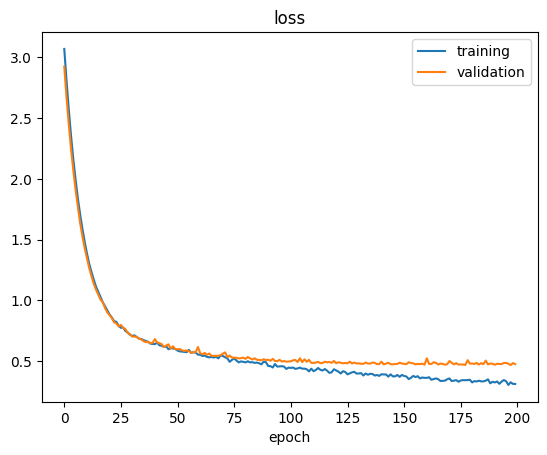

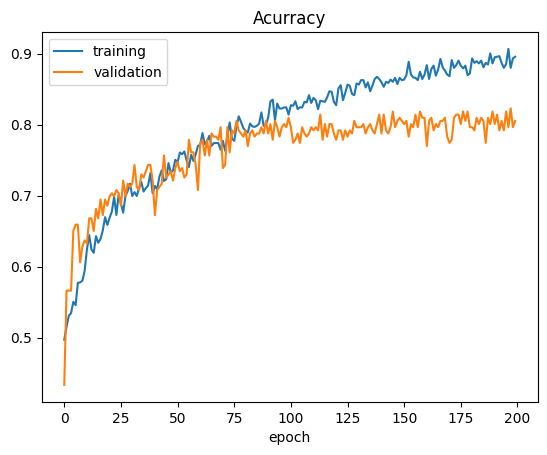

Test Score: 0.5021864175796509
Test Accuracy: 0.826347291469574


In [167]:
print(model.summary())

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

In [1]:
# Menyimpan model
model.save('face_weight_classifier.h5')

NameError: name 'model' is not defined